In [1]:
from scipy.io import loadmat
import numpy as np
import  matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [ ]:
### omit class 3 and 4

In [31]:
## load file
whole = loadmat('characters10.mat')
print("columns in file:", whole.keys())

## get omitted data
train_data_whole = whole['train_data']
test_data_whole = whole['test_data']
train_label_whole = whole['train_label']
test_label_whole = whole['test_label']

class_3_train_idx = np.where(train_label_whole == 3)
class_4_train_idx = np.where(train_label_whole == 4)

class_3_test_idx = np.where(test_label_whole == 3)
class_4_test_idx = np.where(test_label_whole == 4)

omit_tr_idx = np.concatenate((class_3_train_idx[0],class_4_train_idx[0]))
omit_te_idx = np.concatenate((class_3_test_idx[0],class_4_test_idx[0]))

X_tr = np.delete(train_data_whole, omit_tr_idx, axis=0)
X_te = np.delete(test_data_whole, omit_te_idx, axis=0)

### standardization
X_tr = X_tr/255.0
X_te = X_te/255.0

Y_tr = np.delete(train_label_whole, omit_tr_idx, axis=0)
Y_te = np.delete(test_label_whole, omit_te_idx, axis=0)

columns in file: dict_keys(['__header__', '__version__', '__globals__', 'test_data', 'test_label', 'train_data', 'train_label'])


In [32]:
### check omitted data
np.any(Y_tr ==4), np.any(Y_te ==3)

(False, False)

## c-1)

In [228]:

def find_BMU(xi, weights):
    BMU_idx = np.argmin(np.linalg.norm(xi-weights))
    dis=np.zeros((10,10))
    for i in range (weights.shape[0]):
        for j in range (weights.shape[1]):
            distance = np.linalg.norm(xi-weights[i][j])
            dis[i][j] = distance
    min_index = np.argmin(dis) 
    return  np.unravel_index(min_index, dis.shape) 

def update_weights(xi, weights, BMU_idx, sigma,n):

    for i in range (weights.shape[0]):
        for j in range ( weights.shape[1] ):
            hij = np.exp(-np.linalg.norm([np.array([i,j]) - BMU_idx ],ord =2)**2/(2*sigma**2))
            weights[i] += n*hij*(xi-weights[i])
    
    return weights


def label_neuron(neuron_labels, label, BMU_idx):
    #label_idx = np.insert ( w_idx,2,label)
    #print(label_idx)
    neuron_labels[w_idx[0],w_idx[1] , label] +=1 # 
    #print(neuron_labels[w_idx[0],w_idx[1]])
    return neuron_labels

In [247]:
import random
random.seed(155)
weights = 0.02* np.random.rand(10,10,784)

epoch = 10000
neuron_labels = np.zeros((10,10,10))

for epoch in range(epoch):
    sigma = 5.34*np.exp(-epoch*np.log(18)/2000)
    n = 0.1*np.exp(-epoch/1600)
    
    idx = random.randint(0,2400-1)
    xi = X_tr[idx]
    ti = Y_tr[idx]

    w_idx = find_BMU(xi,weights)
    w_idx = np.array(w_idx)
    
    neuron_labels = label_neuron(neuron_labels, ti,w_idx)
    weights = update_weights( xi, weights, w_idx, sigma,n)

## geenrate label map of neurons
neuron_label_map=np.zeros((10,1))
for i in range(10):
    single_neuron_label = np.argmax(neuron_labels[i][0])
    neuron_label_map[i] = single_neuron_label

### labels of neurons
neuron_label_map = neuron_label_map * np.ones((1, 10))
print(neuron_label_map)

[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [8. 8. 8. 8. 8. 8. 8. 8. 8. 8.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [7. 7. 7. 7. 7. 7. 7. 7. 7. 7.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [9. 9. 9. 9. 9. 9. 9. 9. 9. 9.]
 [9. 9. 9. 9. 9. 9. 9. 9. 9. 9.]
 [6. 6. 6. 6. 6. 6. 6. 6. 6. 6.]
 [5. 5. 5. 5. 5. 5. 5. 5. 5. 5.]]


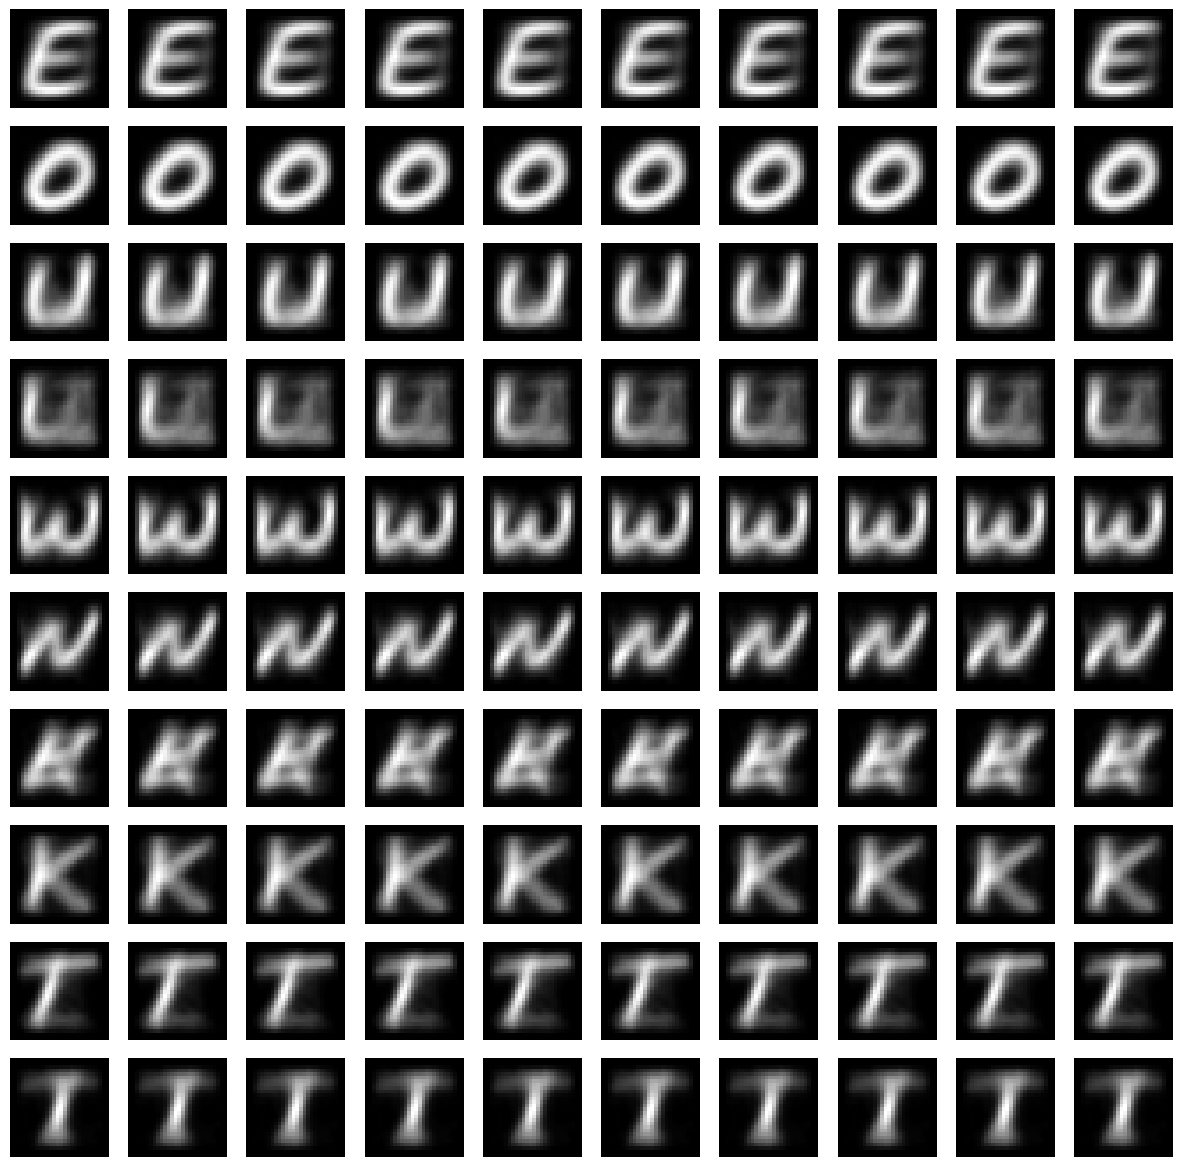

In [248]:
## visualize neurons

fig, axes = plt.subplots(10, 10, figsize=(15, 15))
for i in range(10):
    for j in range(10):
        index = i * 10 + j
        neu = weights[i][j]*255
        axes[i, j].imshow(neu.reshape(28, 28).T, cmap='gray')
        axes[i, j].axis('off')

# adjust distance
plt.subplots_adjust(wspace=0.2, hspace=0.1)
plt.show()

In [249]:
### test model
pred_label = np.zeros((X_te.shape[0],1))

for te_idx, xi_te in enumerate(X_te):
    w_te_idx = find_BMU(xi_te,weights)
    pred_label[te_idx] = neuron_label_map[w_te_idx]
    
## accuracy
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(Y_te, pred_label)
print("Accuracy:", accuracy)

Accuracy: 0.705


In [243]:
#correct_class = 0
#for i in range (400):
#    if pred_label[i] == Y_te[i]:
#        correct_class+=1
#acc = correct_class/400
#acc